In [1]:
%matplotlib notebook

import json
import cv2
import json
import os
import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#打开包含所有文件名的json文件，提取所有图片名称
images = open(r'C:\Users\EDZ\Desktop\try_fr\car-try\car-try\images.json')
names = json.load(images)

10


In [4]:
#所有图片所在的目录
dir_path = r'C:\Users\EDZ\Desktop\try_fr\car-try\car-try'
dir_path = os.path.abspath(dir_path) 

#将分别的json合并为一个，并加入size和file_name两个元素
json_list_origin = []

for name in names:
    name_append = name + '.json'
    
    cur_image_path = os.path.join(dir_path,name)
    cur_json_path = os.path.join(dir_path,name_append)
    
    cur_image_file = Image.open(cur_image_path)
    cur_json_file = open(cur_json_path)
    cur_json = json.load(cur_json_file)
    
    cur_json['file_name'] = name
    size = list(cur_image_file.size)
    size.reverse()
    cur_json['size'] = size
    json_list_origin.append(cur_json)
    
    cur_image_file.close()
    cur_json_file.close()    

C:\Users\EDZ\Desktop\try_fr\car-try\car-try


In [5]:
pprint.pprint(json_list_origin[0])

{'Hardscene': False,
 'Rects': [{'h': 120.5825242718447,
            'properties': {'car2d_box_mulit_type': ['box']},
            'w': 147.23300970873788,
            'x': 1469.270759964808,
            'y': 976.5274744597223},
           {'h': 118.39805825242729,
            'properties': {'car2d_box_mulit_type': ['guess']},
            'w': 156.84466019417482,
            'x': 1529.5620221007302,
            'y': 964.2944647509844},
           {'h': 134.9999999999999,
            'properties': {'car2d_box_mulit_type': ['box']},
            'w': 205.33980582524282,
            'x': 2164.0224762107405,
            'y': 922.6826734560594},
           {'h': 277.2553725319076,
            'properties': {'car2d_box_mulit_type': ['box']},
            'w': 360.51052688993127,
            'x': 1656.389956524552,
            'y': 1463.3381424914294},
           {'h': 103.36071695294982,
            'properties': {'car2d_box_mulit_type': ['box']},
            'w': 161.31441374159817,
          

In [6]:
#json格式变换
json_list_new = []
for jsons in json_list_origin:
    #labels元素初始化
    labels = {}
    labels['flipped'] = False
    labels['gt_boxes'] = []
    labels['gt_classes'] = []
    labels['hide_percent'] = []
    labels['gt_ignore_boxes'] = []
    labels['gt_ignore_classes'] = []
    
    #lables增加元素
    for rect in jsons['Rects']:
        gt_box = []
        gt_box.append(rect['x'])#xmin
        gt_box.append(rect['y'])#ymin
        gt_box.append(rect['x'] + rect['w'])#xmax
        gt_box.append(rect['y'] + rect['h'])#ymax
        labels['gt_boxes'].append(gt_box)
        labels['gt_classes'].append(1)
        labels['hide_percent'].append(0)
    
    #创建一个新的json
    json_new = {}
    json_new['file_name'] = jsons['file_name']
    json_new['size'] = jsons['size']
    json_new['labels'] = labels
    
    #加入json_list_new
    json_list_new.append(json_new)
    

In [7]:
#单个图片的json数据格式
pprint.pprint(json_list_new[0])

{'file_name': '0905GH010248.mp40.jpg',
 'labels': {'flipped': False,
            'gt_boxes': [[1469.270759964808,
                          976.5274744597223,
                          1616.5037696735458,
                          1097.109998731567],
                         [1529.5620221007302,
                          964.2944647509844,
                          1686.406682294905,
                          1082.6925230034117],
                         [2164.0224762107405,
                          922.6826734560594,
                          2369.3622820359833,
                          1057.6826734560593],
                         [1656.389956524552,
                          1463.3381424914294,
                          2016.9004834144832,
                          1740.593515023337],
                         [1195.2791389038284,
                          1628.88632516942,
                          1356.5935526454266,
                          1732.2470421223697],
                

1469 976 1616 1097
1529 964 1686 1082
2164 922 2369 1057
1656 1463 2016 1740
1195 1628 1356 1732
1335 1643 1487 1744
1472 1646 1615 1755
992 1529 1147 1637
913 1367 1030 1445
1043 1324 1161 1393
1393 1527 1551 1626
1534 1527 1683 1626
1716 1442 1840 1526
1581 1442 1706 1526
1724 1373 1836 1449
1859 1340 1977 1433
2779 1698 2965 1818
2817 1630 3021 1767
2847 1587 3027 1695
2918 1546 3090 1650
2192 1166 2284 1225
2227 1112 2316 1172
2362 1151 2444 1205
2347 1054 2427 1106
1884 1025 1991 1072
1786 1002 1865 1039
1360 1035 1430 1090
1480 1064 1548 1114
1426 1028 1485 1072
1400 954 1456 993
1455 953 1512 988
2867 1420 3017 1505
2559 1363 2648 1408
2893 1236 2932 1284
2890 1179 2969 1236
3011 1098 3090 1151
2635 1108 2717 1160
2545 1069 2623 1116
2467 1010 2535 1058
2539 958 2622 1014
2687 1008 2758 1054
2847 969 2915 1015
2852 918 2918 959
2914 841 2979 887
2694 869 2759 908
2641 930 2708 972
2510 826 2659 921
2505 814 2556 845
2456 828 2511 862
2401 845 2457 879
2393 876 2456 913
1530 1220

<IPython.core.display.Javascript object>


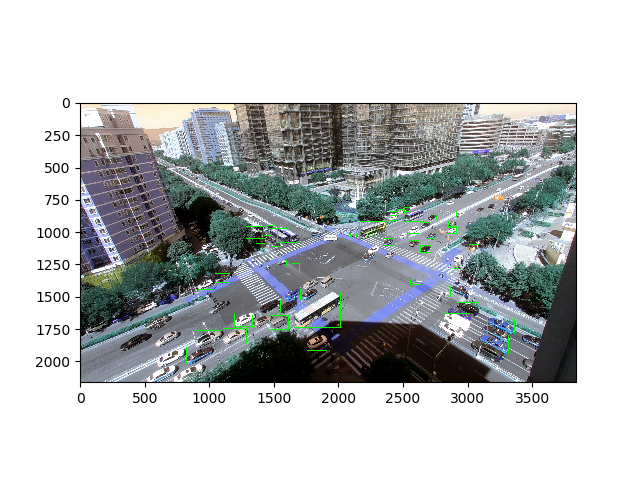

In [10]:
#可视化查看转换结果
img_name = json_list_new[0]['file_name']
img = cv2.imread(os.path.join(dir_path,img_name))
labels = json_list_new[0]['labels']
for gt_box in labels['gt_boxes']:
    xmin = int(gt_box[0])
    ymin = int(gt_box[1])
    xmax = int(gt_box[2])
    ymax = int(gt_box[3])
    print(xmin,ymin,xmax,ymax)
    cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (0,255,0), 2)
plt.imshow(img)